In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 라이브러리들 불러오기

plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)
import missingno as msno # 결측치 시각화 모듈

import warnings 
warnings.filterwarnings('ignore') # 경고 메시지 무시

%matplotlib inline # 바로 그림을 볼 수 있게 해줌

UsageError: unrecognized arguments: # 바로 그림을 볼 수 있게 해줌


# 1. Dataset 확인

In [86]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [87]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df_train.describe() # 통계치 보기

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 NULL Data Check

In [90]:
for col in df_train.columns: # NULL데이터 퍼센트 확인
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [91]:
for col in df_test.columns: # NULL데이터 퍼센트 확인
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot: >

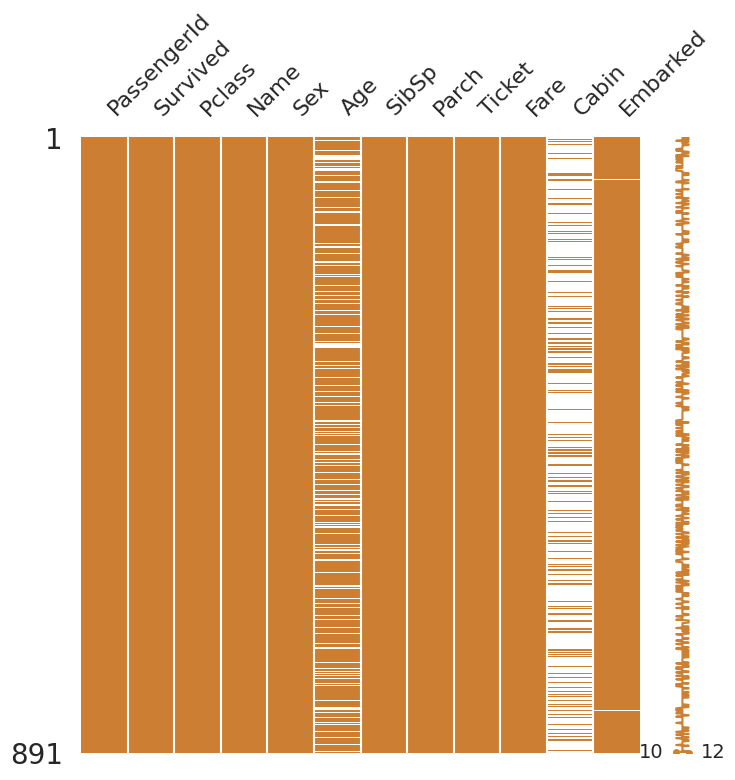

In [92]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # MANO 라이브러리로 NULL Data 보기

<AxesSubplot: >

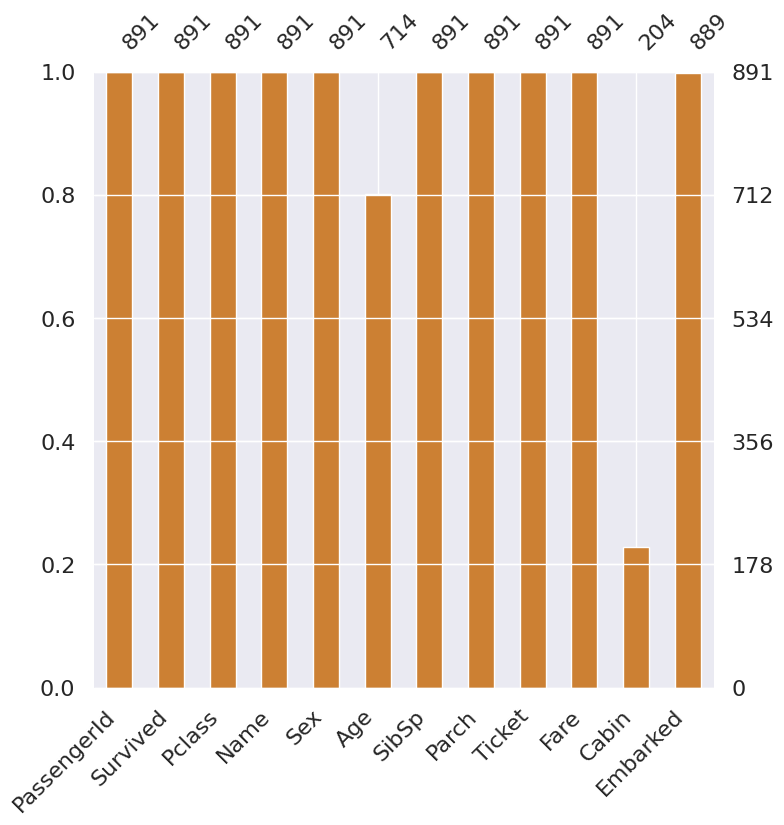

In [93]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # MANO 라이브러리로 NULL Data 보기

<AxesSubplot: >

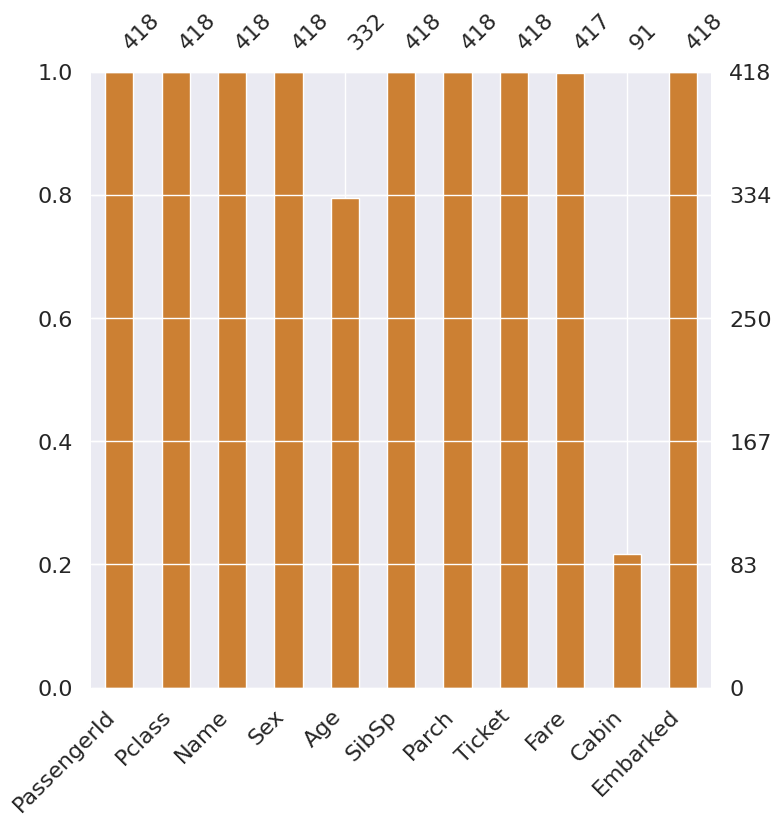

In [94]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # MANO 라이브러리로 NULL Data 보기


## 1.2 Target label 확인

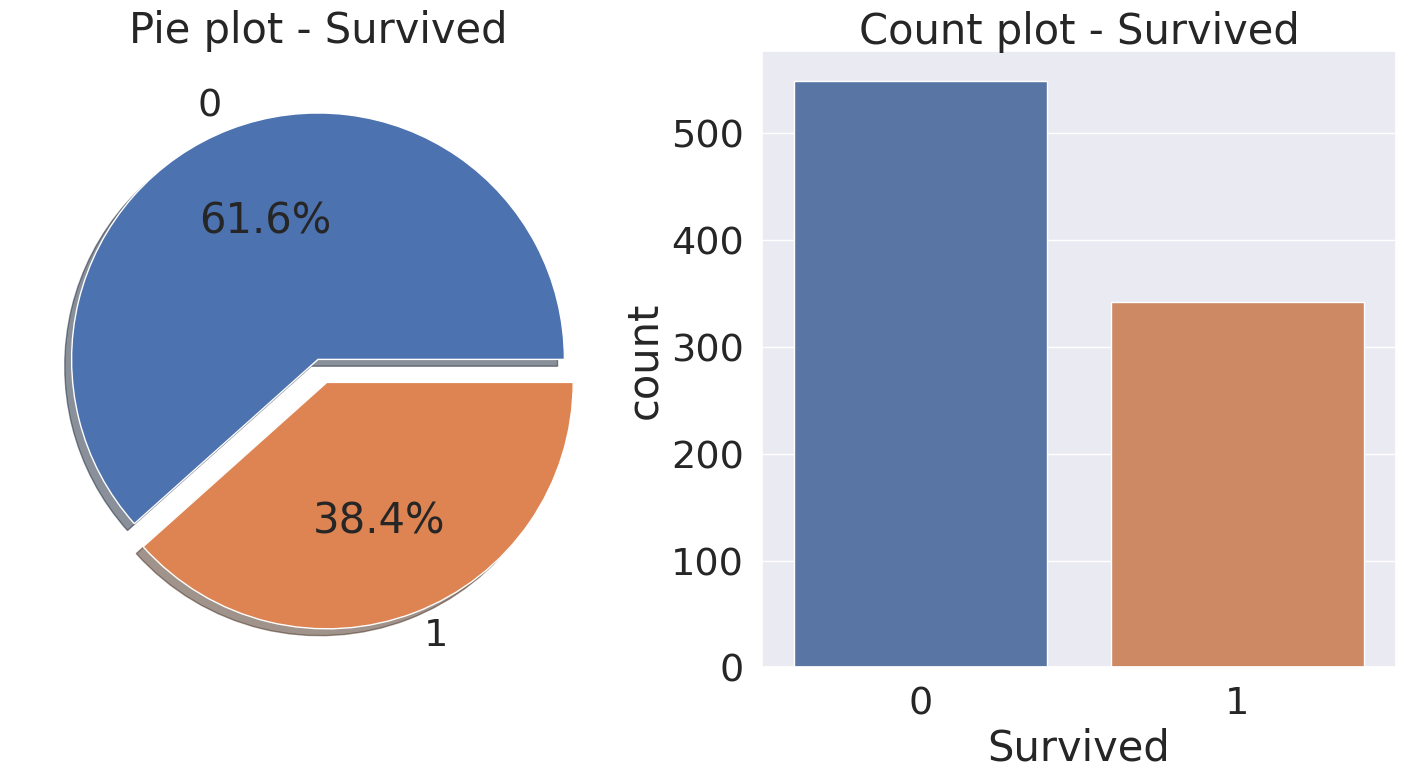

In [95]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 그래프 크기 지정

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # 살아남은 사람 비율 확인
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(df_train,x='Survived', ax=ax[1]) 
ax[1].set_title('Count plot - Survived')

plt.show() # 그래프 보기

# 2. Exploratory data analysis

## 2.1 Pclass

In [96]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # 클래스에 몇 명이 있는 지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [97]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum() # 클래스에 몇 명이 있는 지 확인

,Survived
Pclass,
1,136
2,87
3,119


In [98]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r') # 클래스에 몇 명이 있는 지 히트맵으로 확인

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

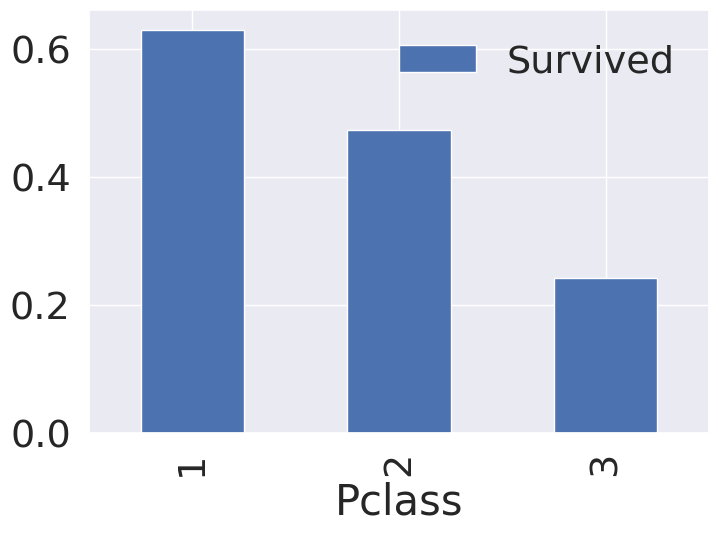

In [99]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() # 클래스에 몇 명이 있는 지 그래프로 확인

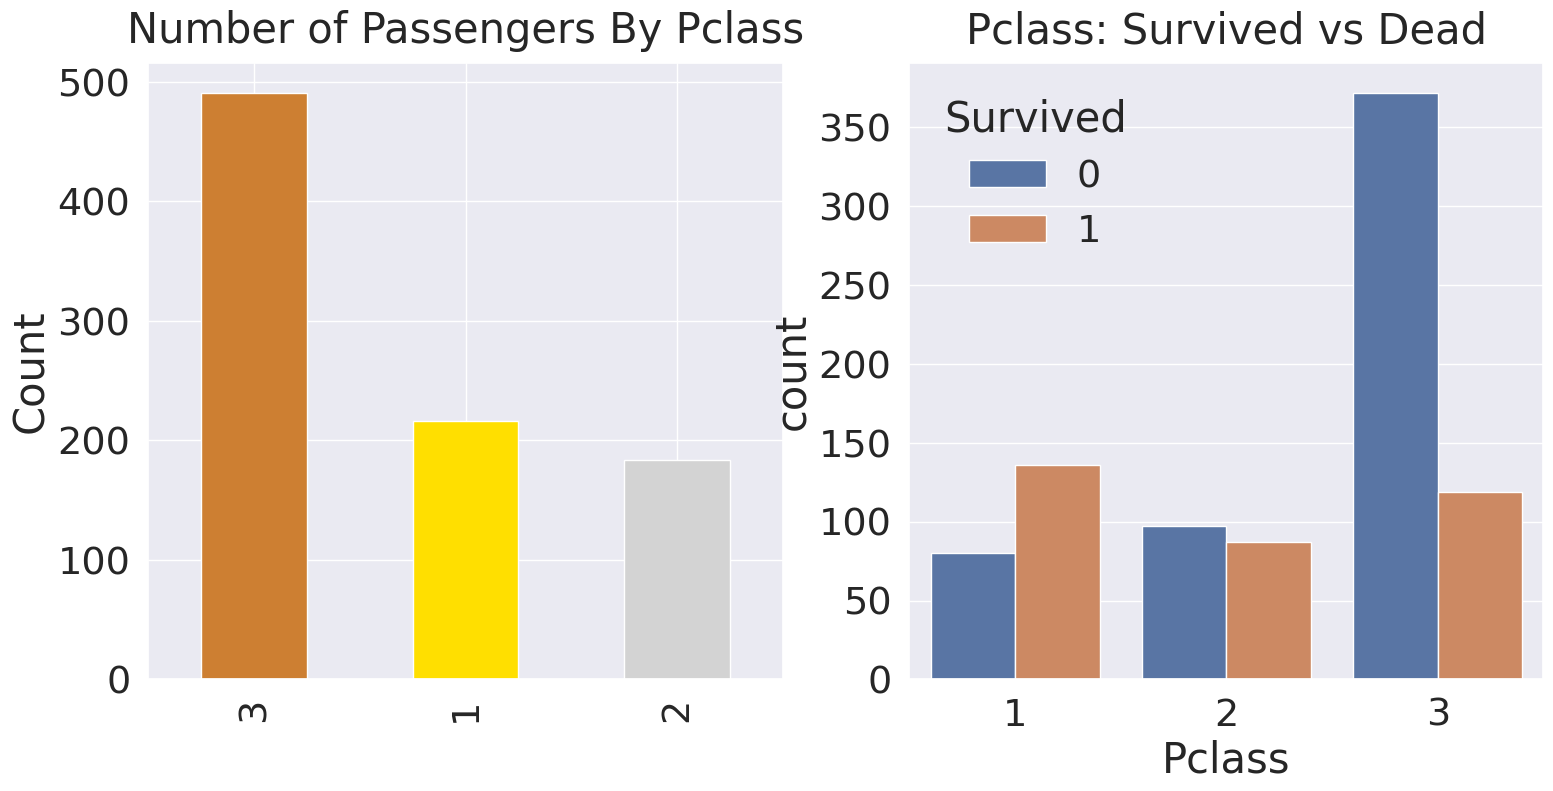

In [100]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 그래프 생성
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0]) # 색 지정
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(df_train, x ='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 Sex

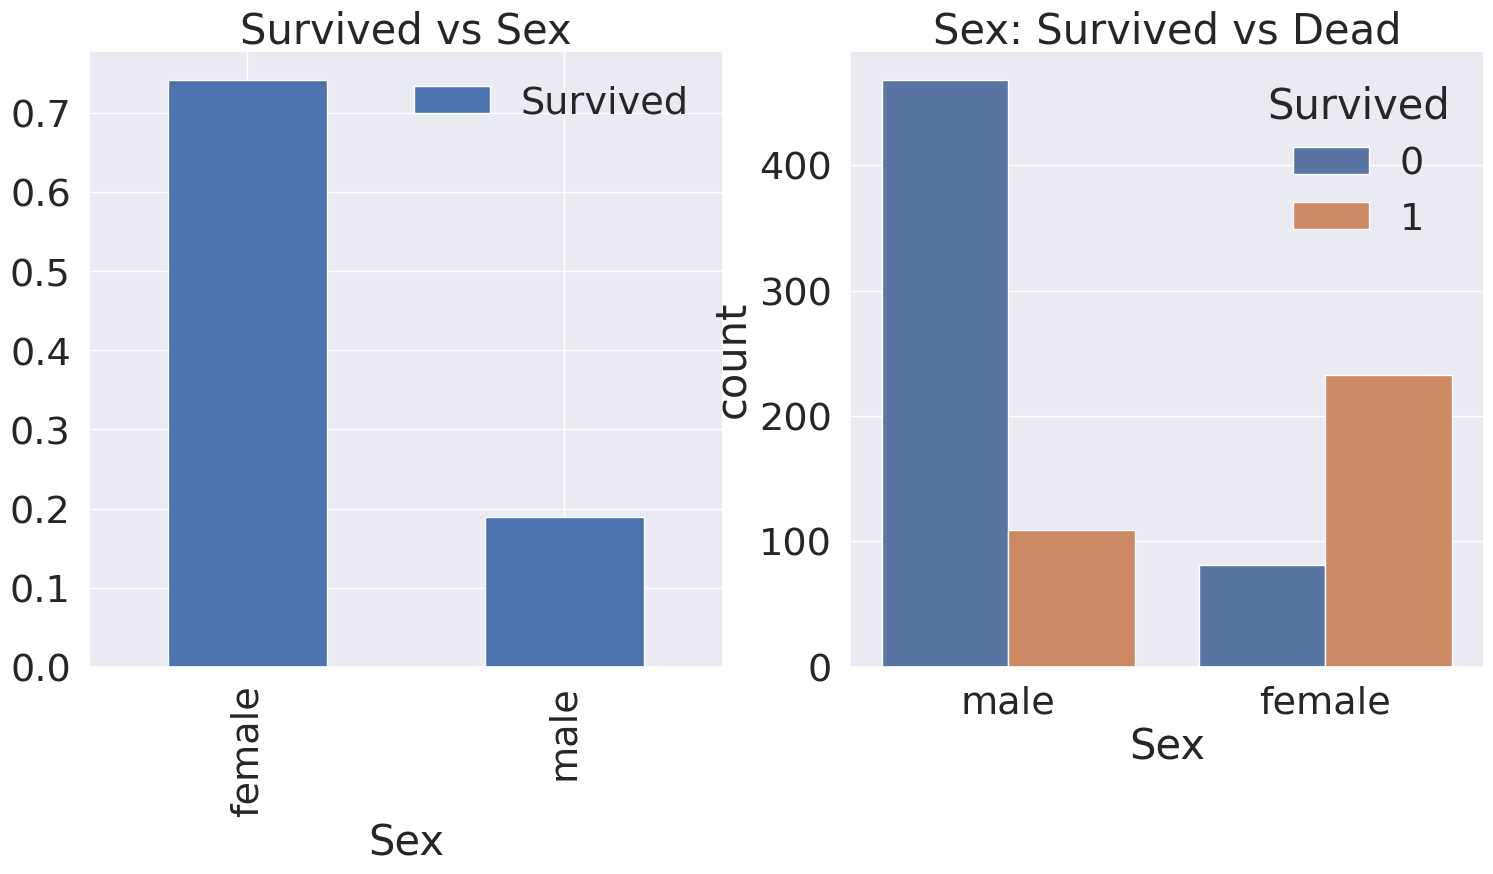

In [101]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 그래프 생성
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(df_train, x='Sex', hue='Survived',ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [102]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False) # 각 성별의 생존확률

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [103]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r') # 각 성별의 생존확률 히트맵으로 확인

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

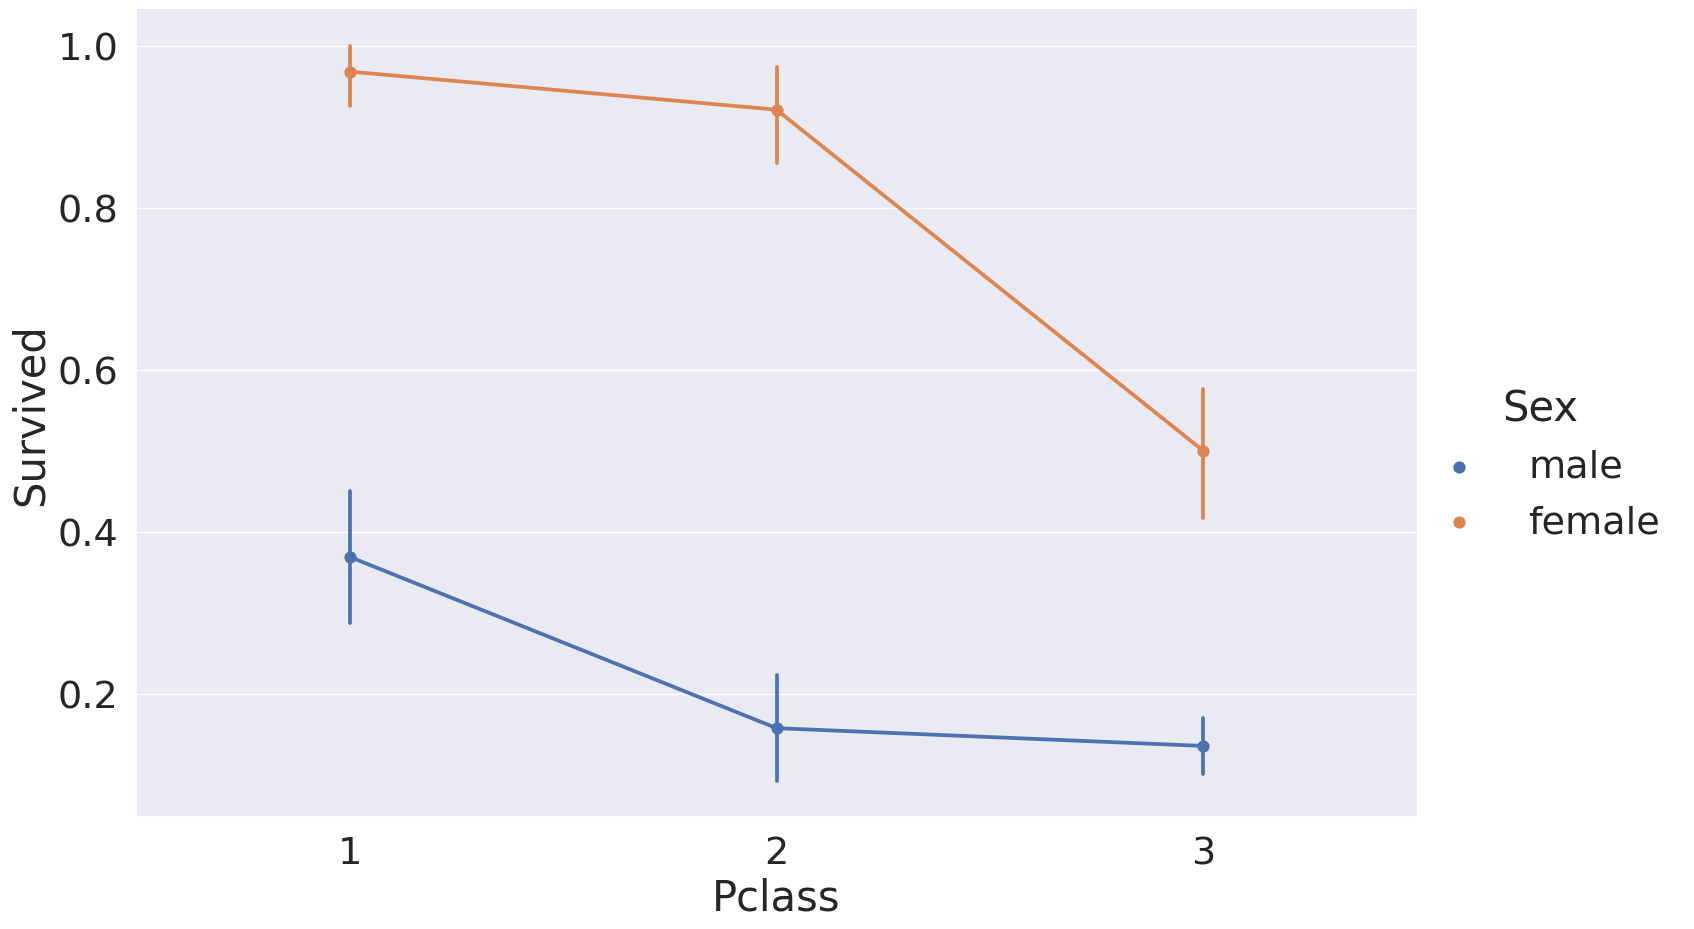

In [104]:
sns.catplot(data = df_train, x='Pclass', y='Survived', hue='Sex', 
             kind = "point", aspect = 1.5, height = 10) # 그래프로 성별의 생존이 어떻게 달라지는 지 확인

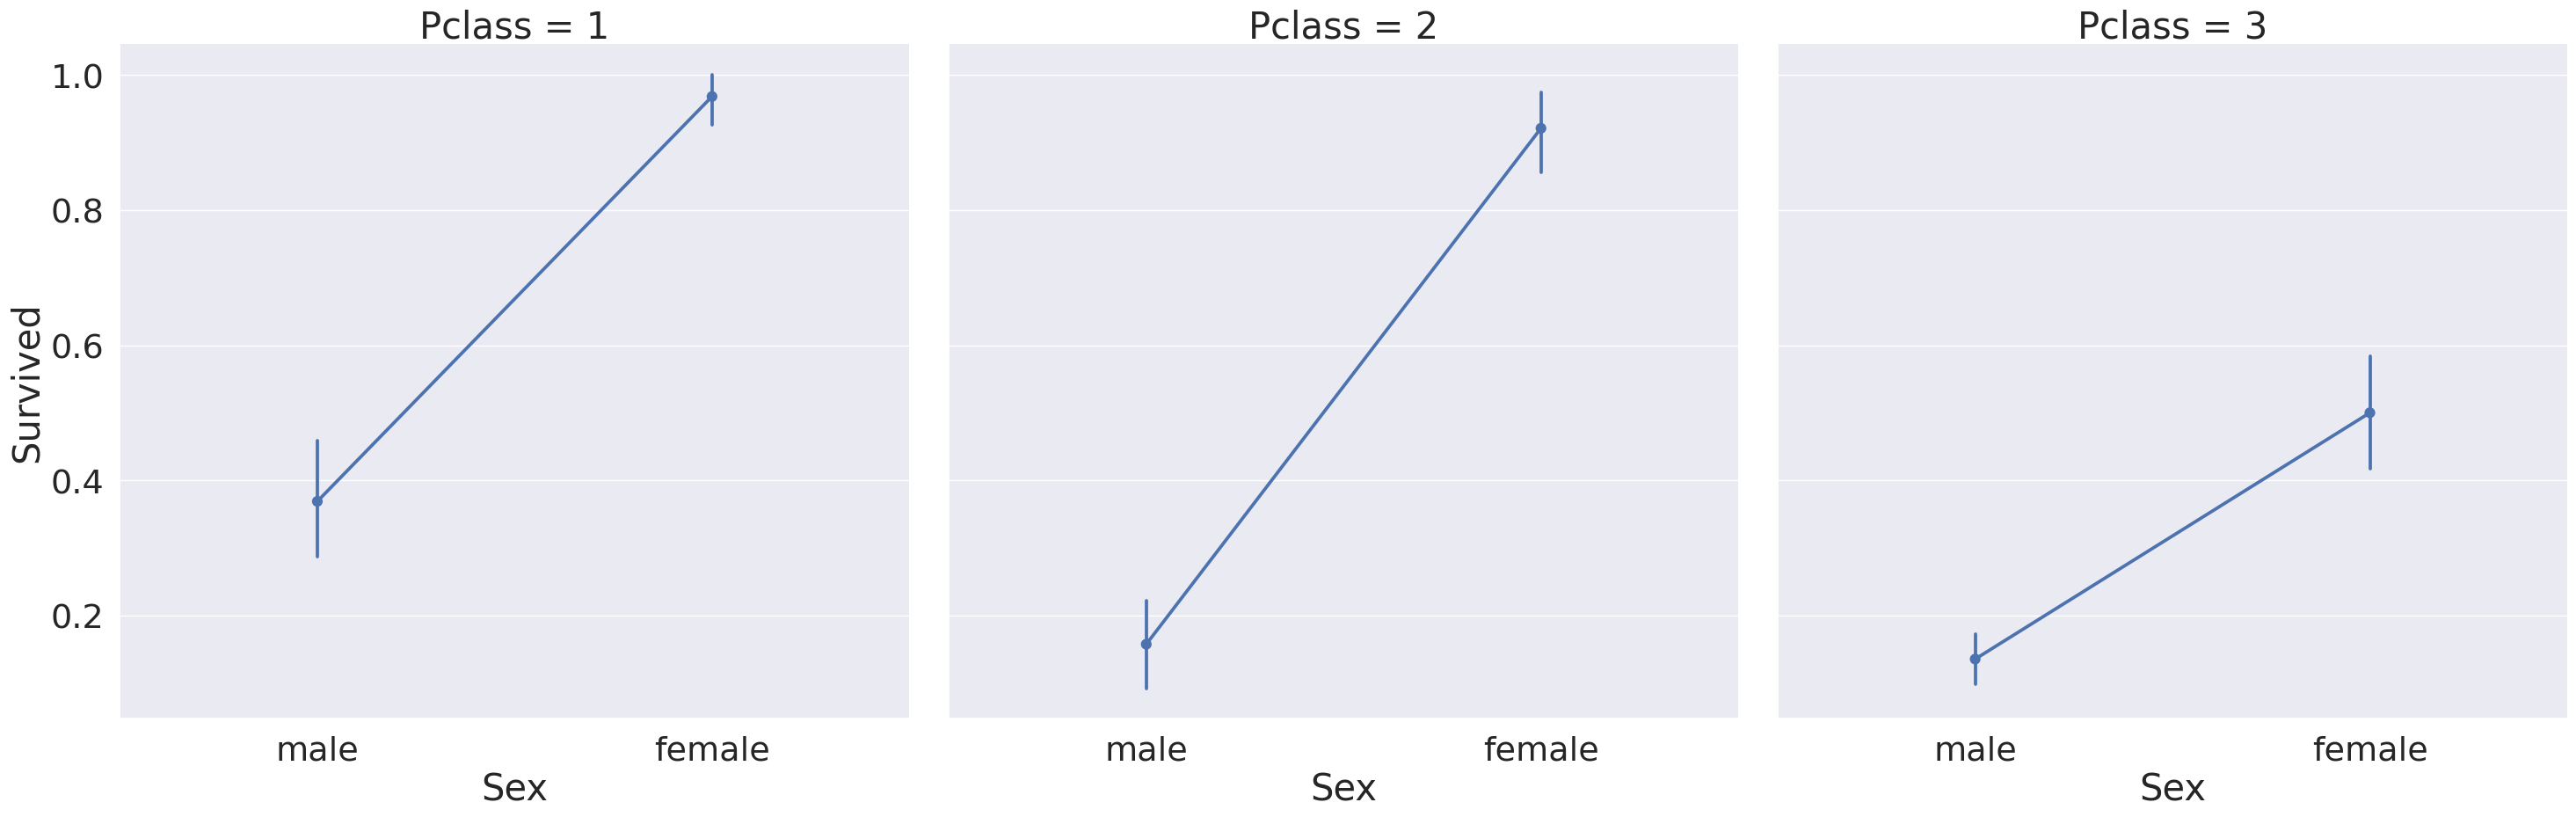

In [105]:
sns.catplot(data = df_train, x='Sex', y='Survived', col='Pclass',
               kind = "point",
               aspect=1, height = 10
              ) # 남자 여자 상관없이 생존확률 그래프 확인

## 2.4 Age

In [106]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max())) # 나이 찾기
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


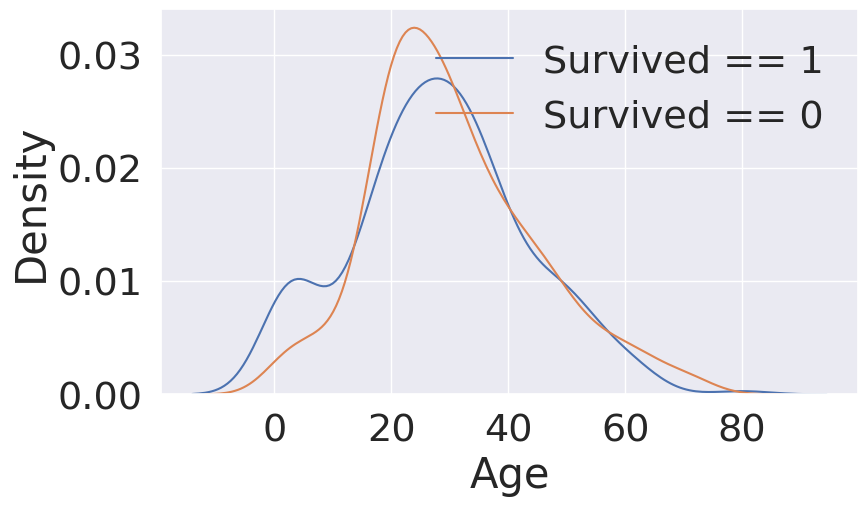

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5)) # 그래프 생성
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) # 나이 분포 그래프 그리기
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

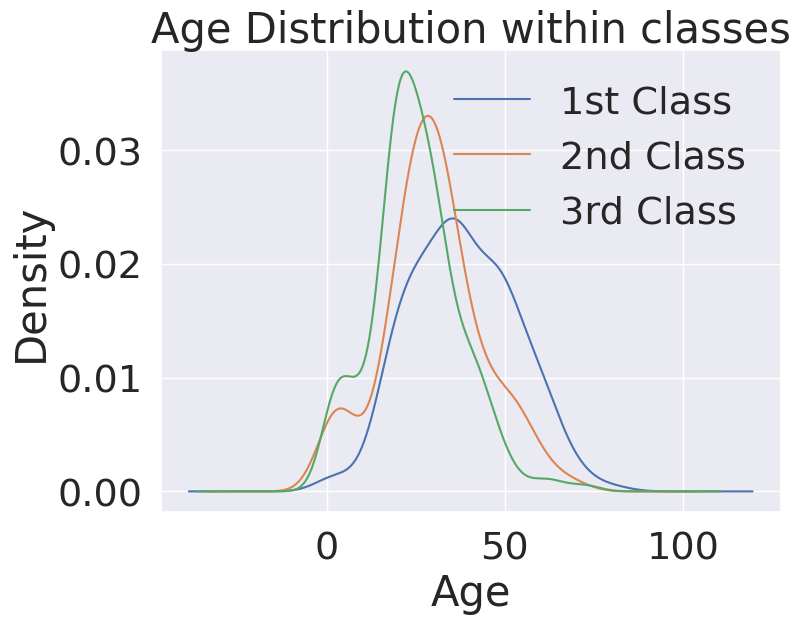

In [108]:
plt.figure(figsize=(8, 6)) # 그래프 생성
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde') # 나이대로 변하는 생존률 그래프로 그리기
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

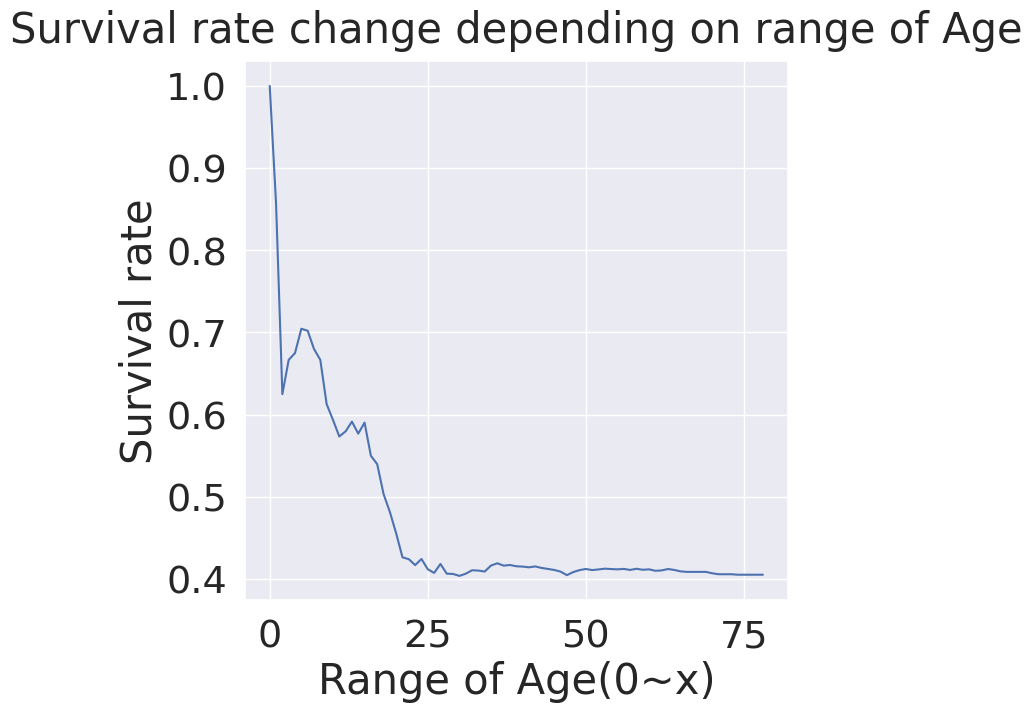

In [109]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])) # 나이별 생존률 그리기
    
plt.figure(figsize=(7, 7)) # 그래프 생성
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## 2.5 Pclass, Sex, Age

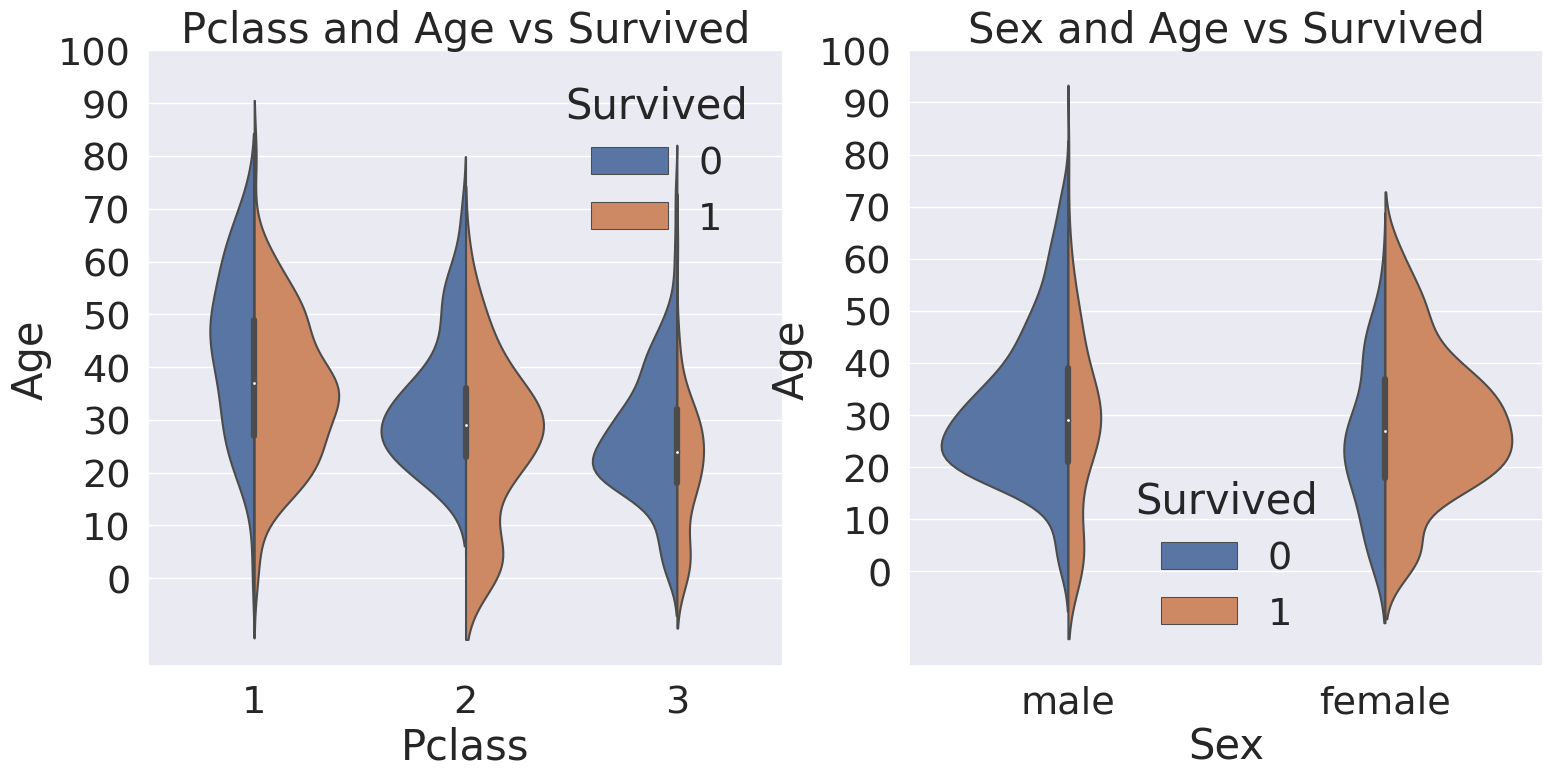

In [110]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # 그래프 생성
sns.violinplot(df_train, x = "Pclass", y = "Age", hue="Survived", scale='count', split=True,ax=ax[0]) # 나이별 생존률을 violinplot 으로 그리기
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(df_train, x = "Sex",y = "Age", hue="Survived", scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 2.6 Embarked

<AxesSubplot: xlabel='Embarked'>

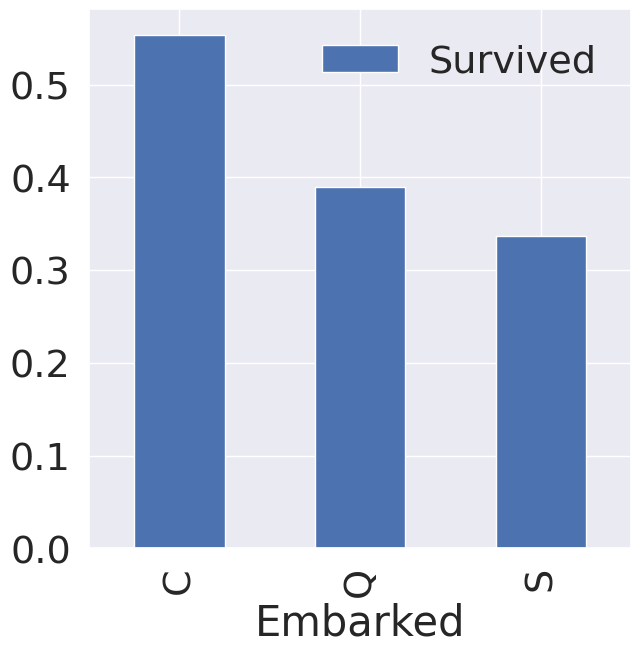

In [111]:
f, ax = plt.subplots(1, 1, figsize=(7, 7)) # 그래프 그리기
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax) # 탑승한 항구에 따른 생존률

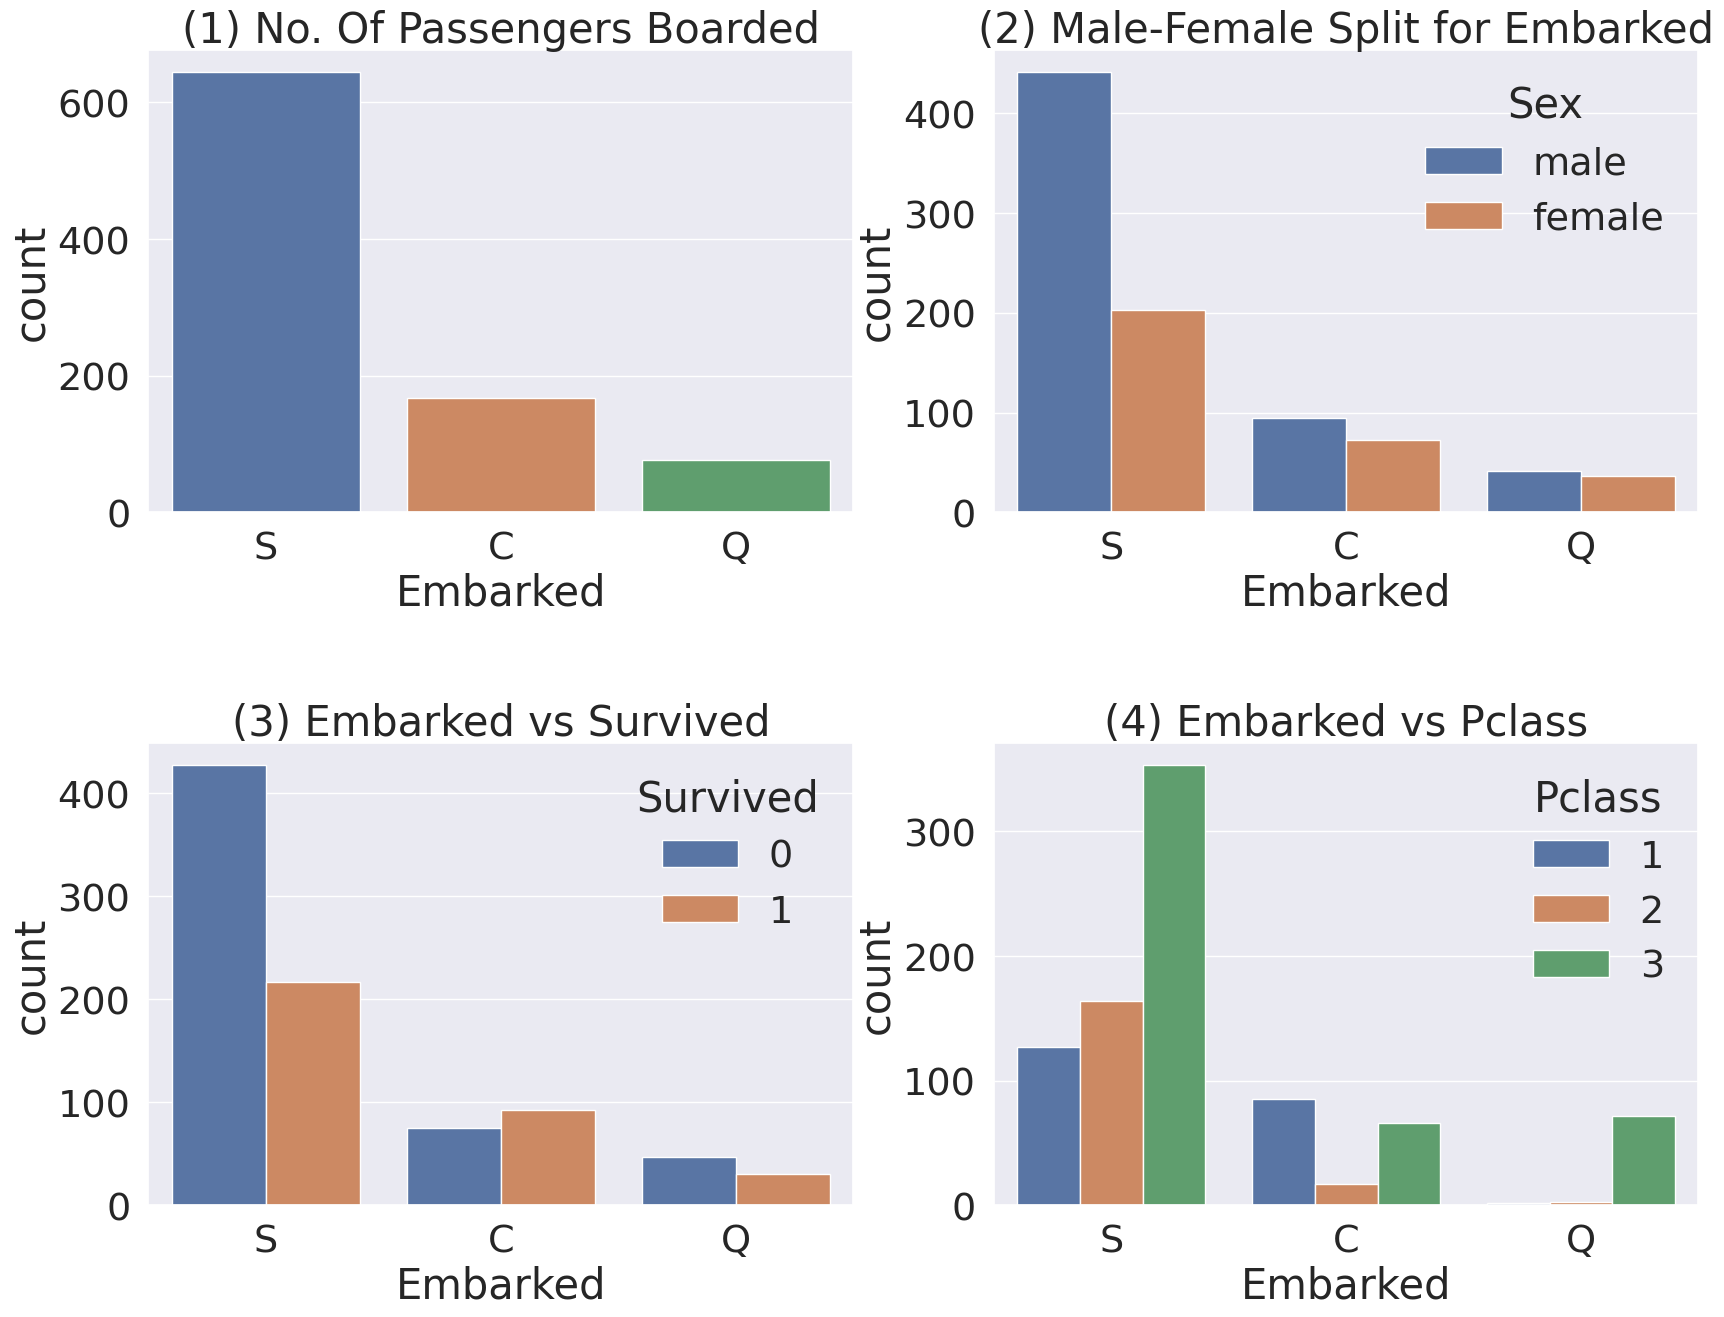

In [112]:
f,ax=plt.subplots(2, 2, figsize=(20,15)) # 그래프 생성
sns.countplot(df_train, x = 'Embarked', ax=ax[0,0]) # 탑승한 사람의 수
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(df_train, x= 'Embarked', hue='Sex', ax=ax[0,1]) # 탑승한 곳에서 탄 성별의 비
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(df_train, x= 'Embarked', hue='Survived', ax=ax[1,0]) # 탑승 항구의 생존확률
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(df_train, x= 'Embarked', hue='Pclass', ax=ax[1,1]) # 탑승 항구의 클래스별 탑승자 수
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family - Sibsp + Parch

In [113]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신까지 포함으로 1 더하기
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

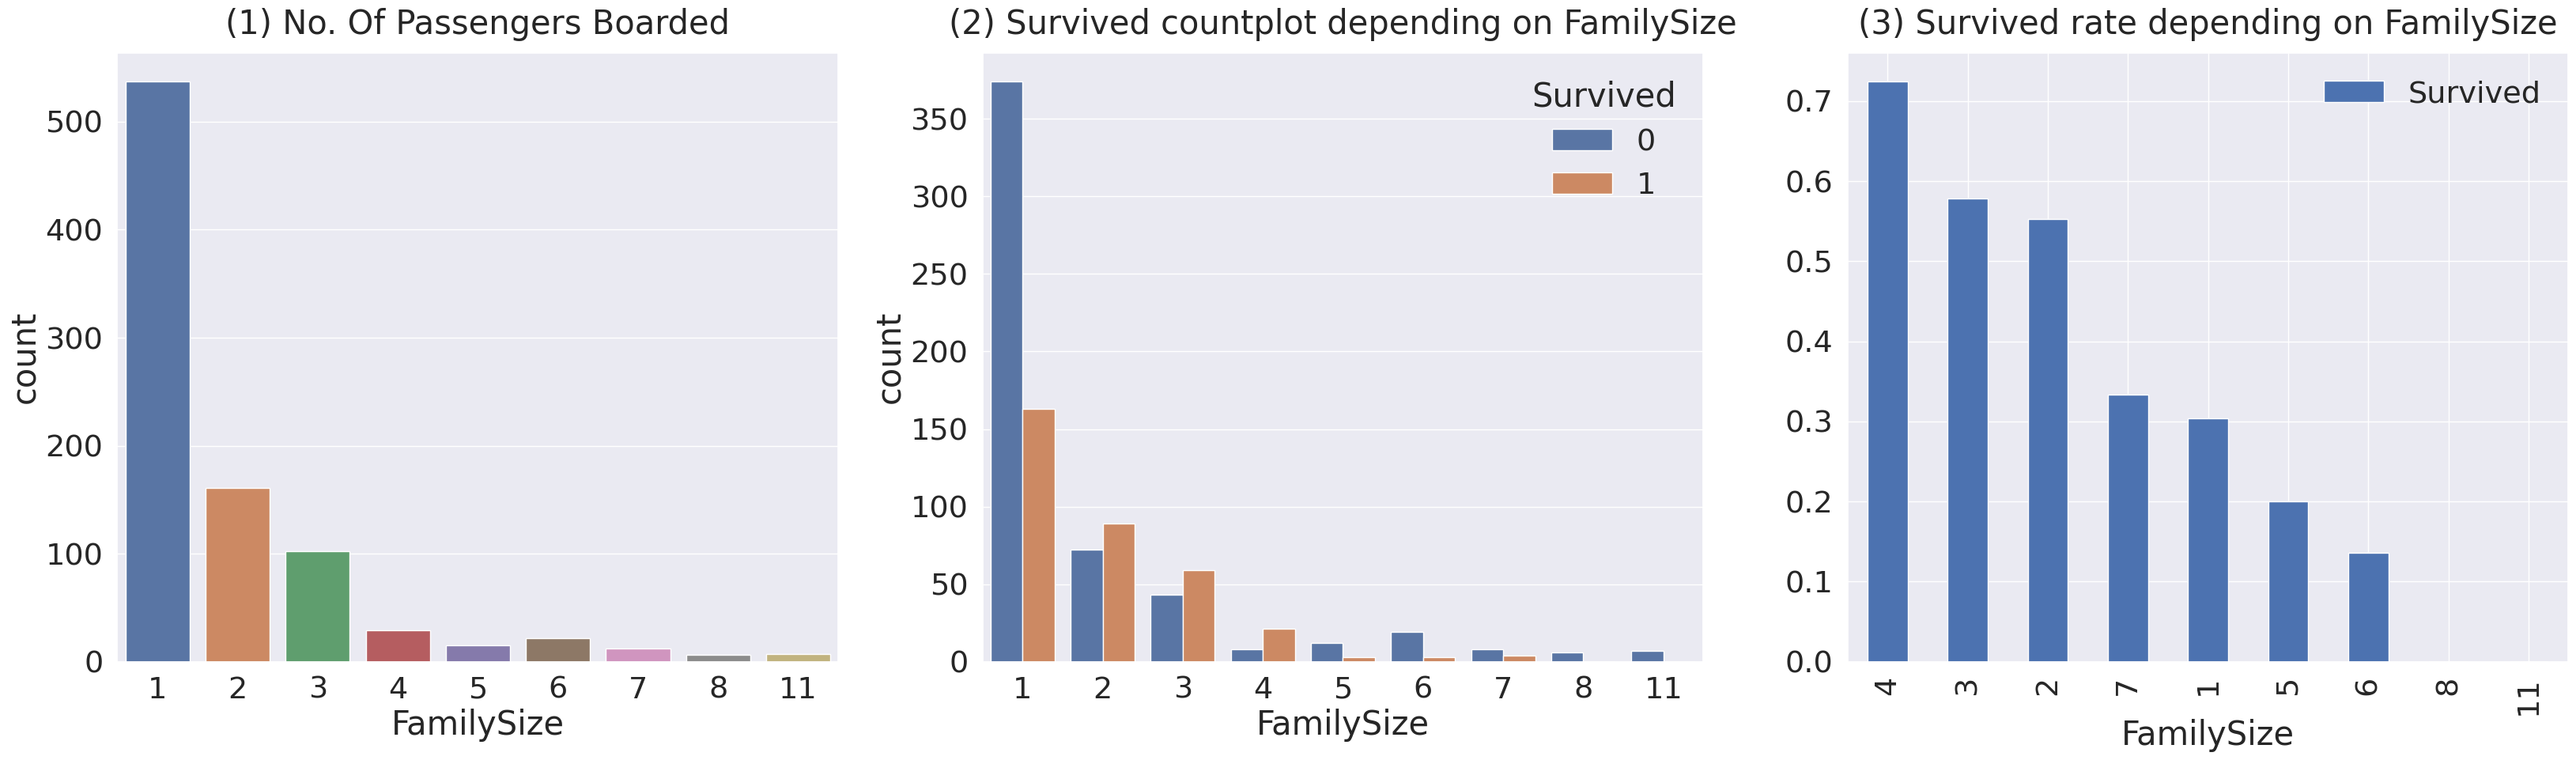

In [114]:
f,ax=plt.subplots(1, 3, figsize=(40,10)) # 그래프 생성
sns.countplot(df_train, x = 'FamilySize',ax=ax[0]) # 가족 크기 확인
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02) 

sns.countplot(df_train, x= 'FamilySize', hue='Survived', ax=ax[1]) # 가족 크기에 따른 생존률
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.8 Fare

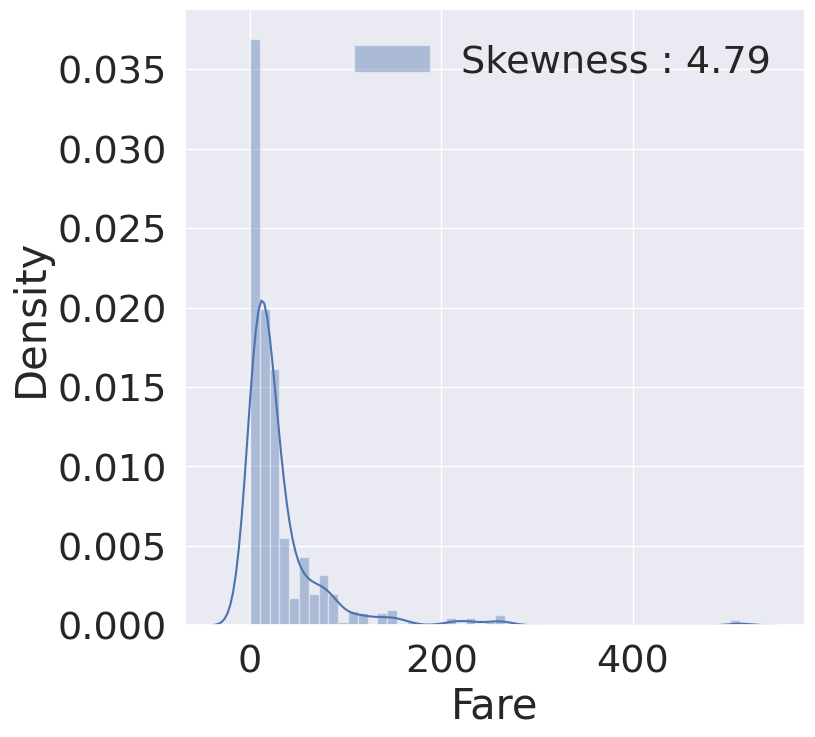

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) # 그래프 생성
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax) # 탑승요금 분포 그래프
g = g.legend(loc='best')

In [116]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset의 null data를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

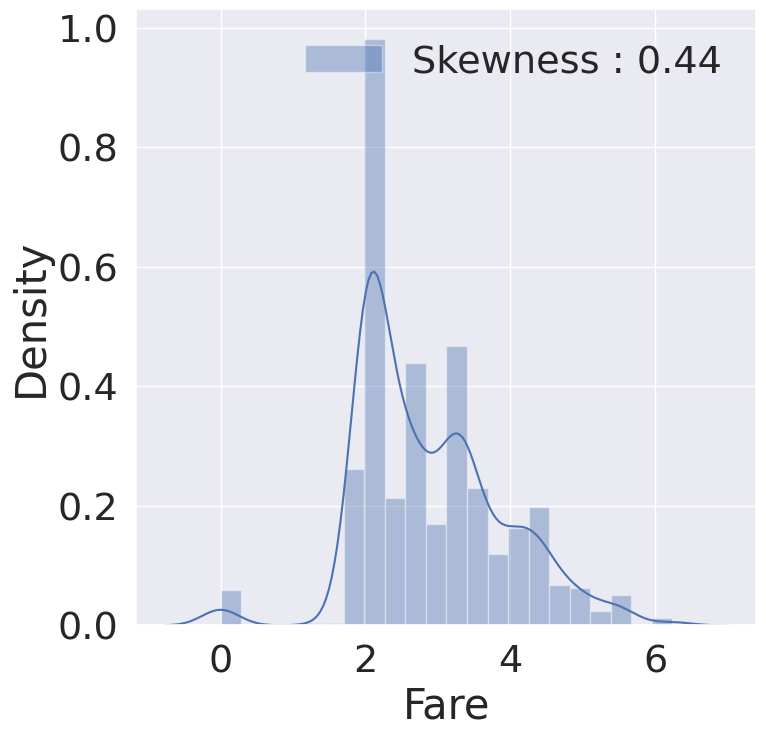

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) # 그래프 그리기
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

In [118]:
df_train.head() # 상위 5개 데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

In [119]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature engineering

## 3.1 Fill Null

### 3.1.1 Fill Null in Age using title

In [120]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # 데이터를 문자형으로 바꾸기

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [121]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') # 성별에 따른 Initial 구분

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [122]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 
                        'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
                            'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True) # 특정 데이터 값을 원하는 값으로 치환

df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 
                        'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
                            'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)

In [123]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot: xlabel='Initial'>

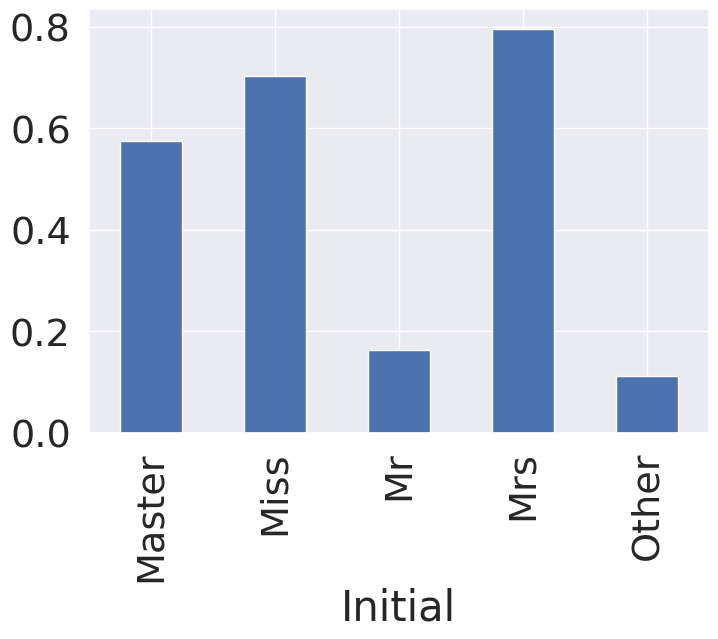

In [124]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [125]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [126]:
# 위의 age 평균으로 Null data 채우기
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Other'), 'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [127]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values') # Embarked의 Null Data 개수 확인

Embarked has 2 Null values


In [128]:
df_train['Embarked'].fillna('S', inplace = True) # Null Data에 S 채우기

## 3.2 Change Age (continuous to categorical)

In [129]:
# Age를 몇 개의 그룹으로 나누기
# 첫 번째 방법
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [130]:
# 두 번째 방법
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [131]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> True


In [132]:
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True) # 중복되는 컬럼 두 개 제거
df_test.drop(['Age'], axis = 1, inplace = True)

## 3.3 Change Initial, Embarked and Sex (string to numerical)

In [133]:
# 컴퓨터가 인식할 수 있도록 수치화
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [134]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [135]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [137]:
df_train['Embarked'].isnull().any() # Null 이 하나라도 있으면 True

False

In [138]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

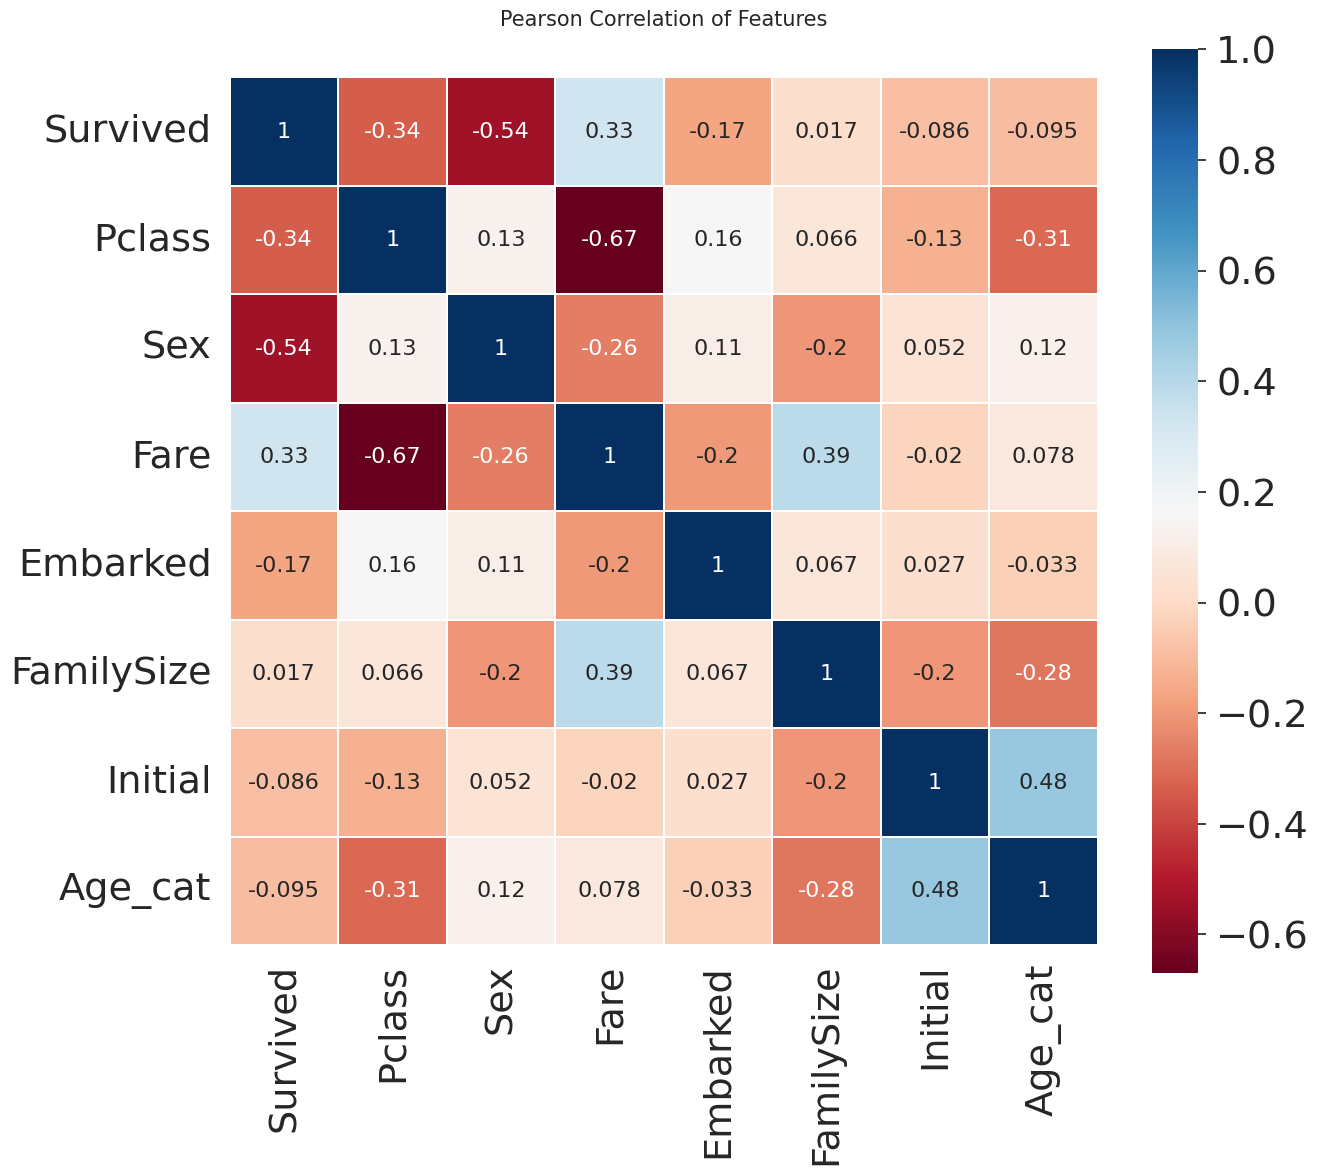

In [139]:
# heatmap 으로 각 feature 간의 상관관계 확인
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws={"size":16})

del heatmap_data

## 3.4 One-hot encoding on Initial and Embarked

In [140]:
# 원-핫 인코딩
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [141]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [142]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

## 3.5 Drop columns

In [143]:
# 필요없는 컬럼 지우기
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [144]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [145]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 4. Building machine learning model and prediction using the trained model

In [146]:
# 머신러닝에 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 4.1 Preparation - Split dataset into train, valid, test set

In [149]:
# 학습에 쓰일 데이터와 타겟 컬럼 분리하여 저장
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [150]:
# 모델 만들기
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

## 4.2 Model generation and prediction

In [151]:
# 모델 학습, 예측
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [152]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.58% 정확도로 생존을 맞춤


## 4.3 Feature importance

In [157]:
# 모델의 feature importance를 저장
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

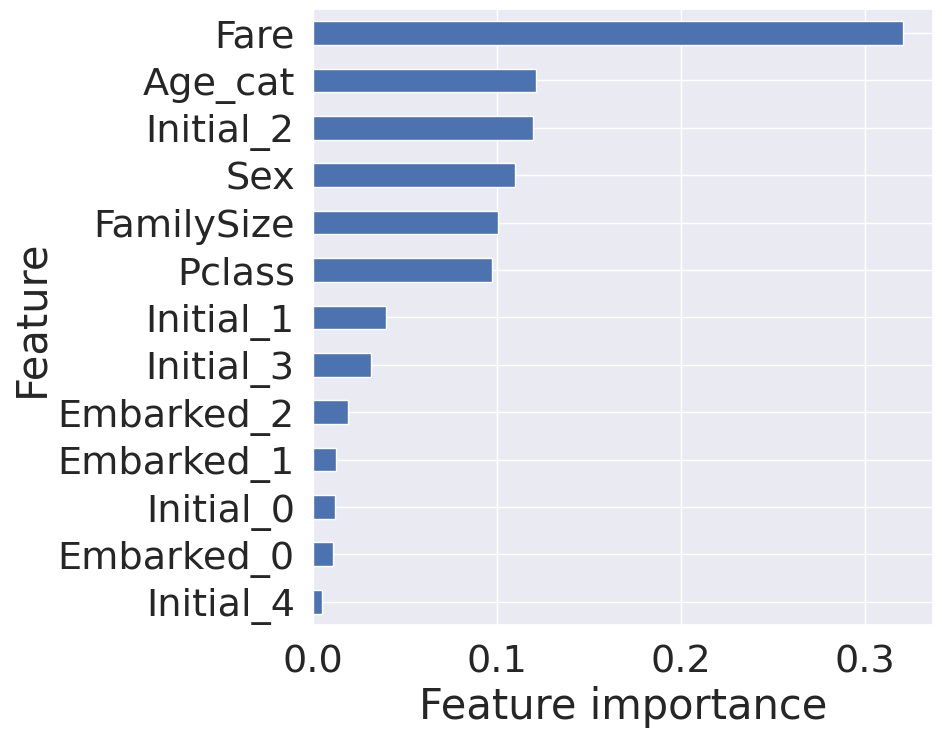

In [158]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set

In [159]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [160]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [161]:
# test셋 예측하기
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [162]:
submission.to_csv('./titanic_end.csv', index = False)